In [1]:
!pip install yfinance 

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 960.0 kB/s eta 0:00:04
      --------------------------------------- 0.1/3.0 MB 975.2 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/3.0 MB 1.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.2 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.2 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.3 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     ------- -------------------------------- 0.6/3.0 MB 1.3 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 1.3 MB/s eta 0:00:02
     -------- ------------------------------- 0.7/3.0 MB 1.3 MB/s e

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf



In [137]:
df = yf.download("AAPL",start="2020-01-01",end="2025-03-9")

[*********************100%***********************]  1 of 1 completed


In [138]:
df.columns = df.columns.get_level_values(0)  # Keep only the first level (Close, High, Low, etc.)



In [139]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


# Exploratory Data Analysis (EDA)

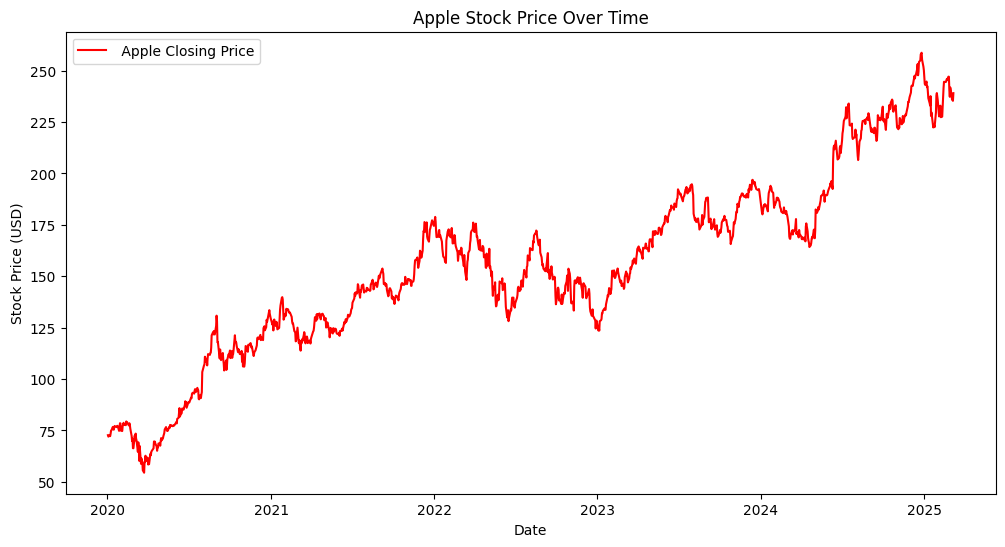

In [140]:
# Plot stock price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label=" Apple Closing Price",color='red')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [141]:
df_2025 = df[df.index >= "2025-01-01"]

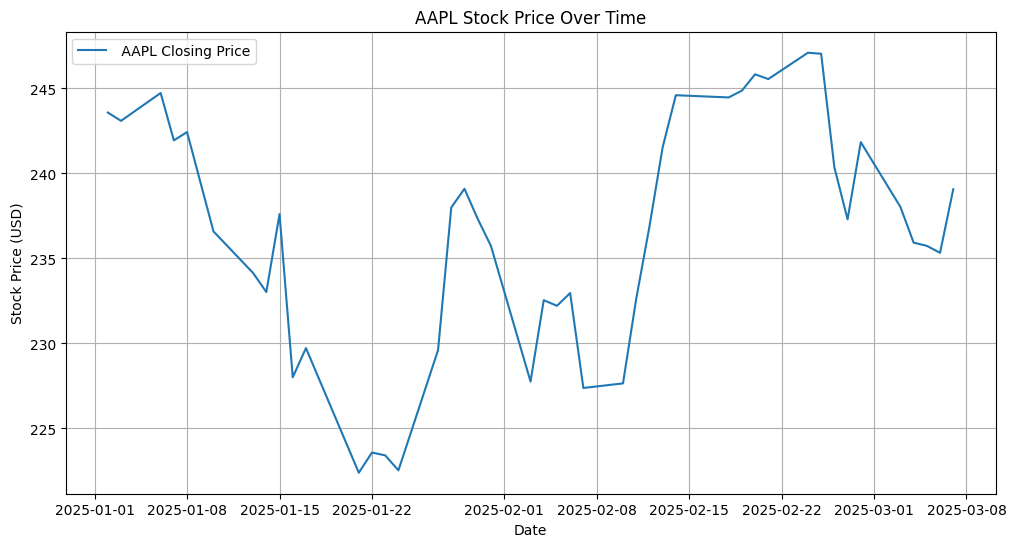

In [142]:
# Plot stock price
plt.figure(figsize=(12,6))
plt.plot(df_2025['Close'], label=" AAPL Closing Price")
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [143]:
df.describe()

Price,Close,High,Low,Open,Volume
count,1302.000000,1302.000000,1302.000000,1302.000000,1.302000e+03
mean,155.023532,156.589835,153.274146,154.865220,8.928117e+07
std,44.086901,44.284563,43.801732,44.031578,5.288650e+07
min,54.449894,55.452160,51.595990,55.350235,2.323470e+07
25%,127.974302,129.346037,126.063530,127.842983,5.427825e+07
50%,152.476288,154.540108,150.693925,152.257209,7.504130e+07
75%,180.794949,182.094037,179.206479,180.927703,1.058044e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


In [144]:
 df.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Text(0.5, 1.0, 'Sales Volume')

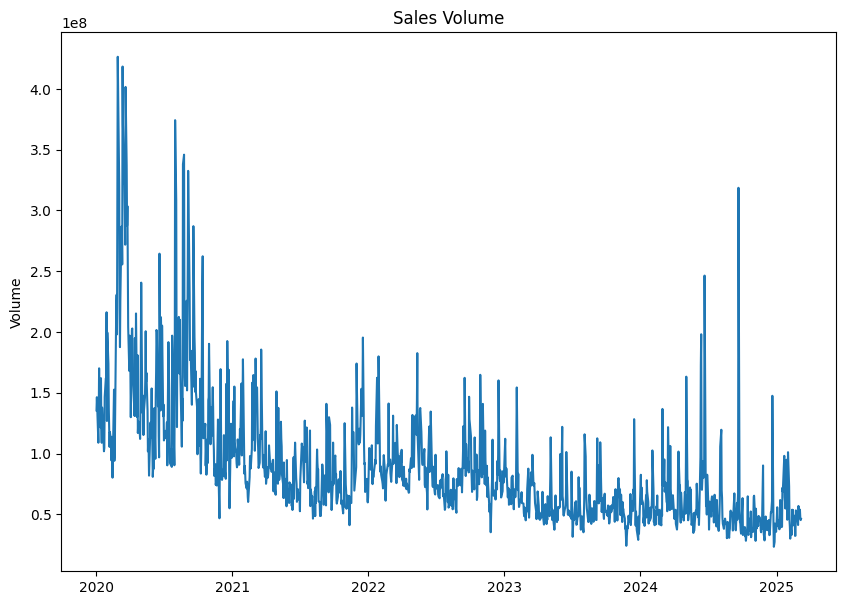

In [145]:
plt.figure(figsize=(10, 7))
plt.plot(df['Volume'], label="  Volume")
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

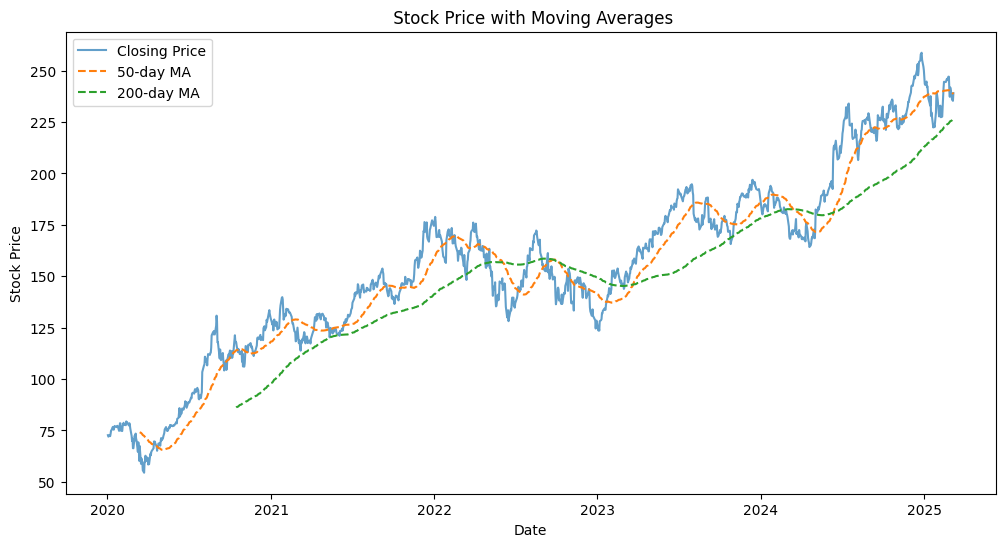

In [146]:
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day Moving Average
df['MA200'] = df['Close'].rolling(window=200).mean()  # 200-day Moving Average

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", alpha=0.7)
plt.plot(df['MA50'], label="50-day MA", linestyle="dashed")
plt.plot(df['MA200'], label="200-day MA", linestyle="dashed")
plt.title(f" Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


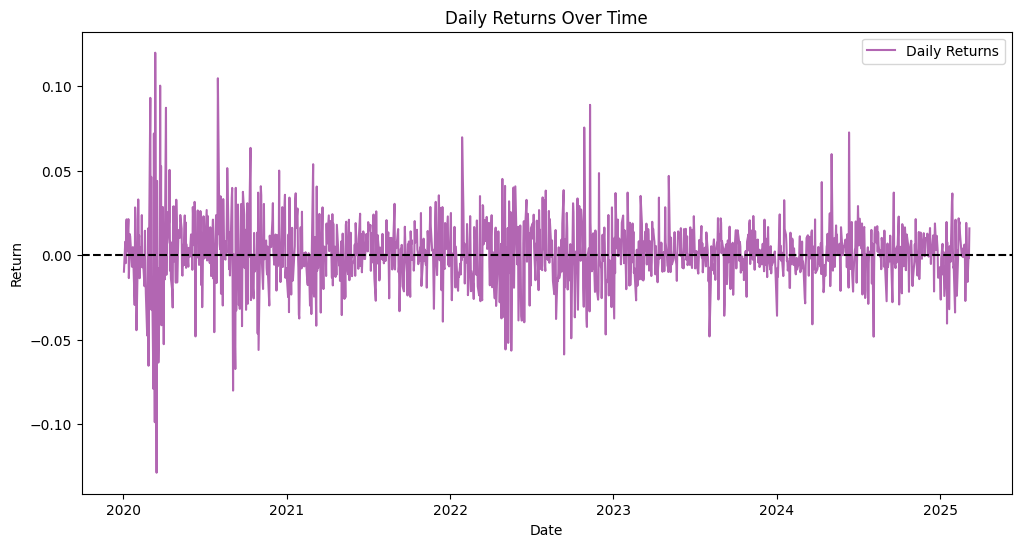

In [147]:
df['Daily Return'] = df['Close'].pct_change()  # (Current Price - Previous Price) / Previous Price

# Plot daily returns
plt.figure(figsize=(12,6))
plt.plot(df['Daily Return'], label="Daily Returns", color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()


## 📊 Understanding Daily Return  

<div style="background-color:#f0f8ff; padding:10px; border-radius:10px; border-left: 5px solid #3498db;">
  <p><strong>🔹 Daily Return (Short-Term)</strong></p>
  <p>Daily return measures how much a stock’s price changes from one day to the next.</p>
  
  <div style="text-align: center; font-size: 18px; font-weight: bold; background-color:#ffffff; padding: 10px; border-radius: 8px; border: 1px solid #ccc; display: inline-block;">
    Daily Return =  
    <span style="font-size: 22px;">(Price<sub>Today</sub> − Price<sub>Yesterday</sub>) / Price<sub>Yesterday</sub></span>
  </div>

  <p style="color:green; font-weight:bold;">✅ Good for short-term trading and risk analysis.</p>
</div>


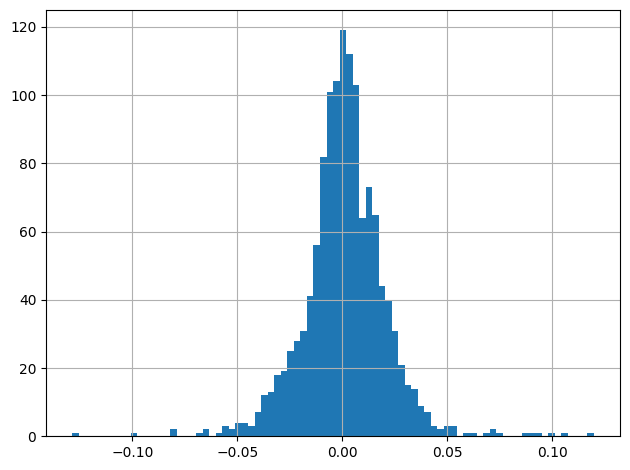

In [148]:
df["Daily Return"].hist(bins = 80)
plt.tight_layout()
plt.show()

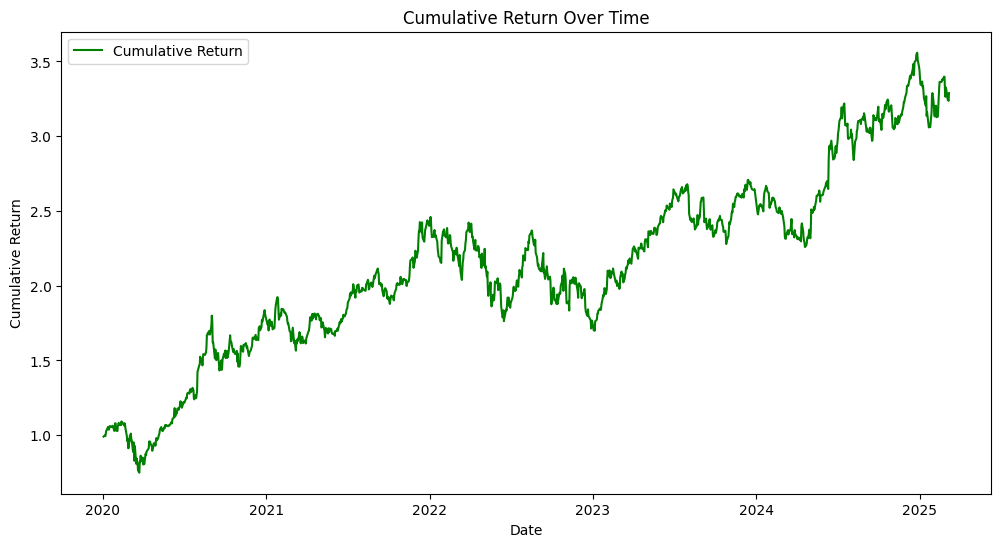

In [149]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative Return'], label="Cumulative Return", color='green')
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


## 📈 Understanding Cumulative Return  

Cumulative Return represents the <span style="color:green; font-weight:bold;">total percentage gain or loss</span> of an investment over a specific period. Unlike **daily returns**, which capture short-term price fluctuations, cumulative return provides a broader view of an asset’s overall performance.

### 🔍 Key Insights:  
✅ <span style="color:green;">**Positive Returns**</span> → The stock is <span style="color:green;">**gaining value**</span> 📊  
❌ <span style="color:red;">**Negative Returns**</span> → The stock is <span style="color:red;">**losing value**</span> 📉  
⚡ <span style="color:orange;">**Higher Volatility**</span> → The stock carries <span style="color:orange;">**greater risk**</span> ⚠️  


Stock Volatility: 0.0199


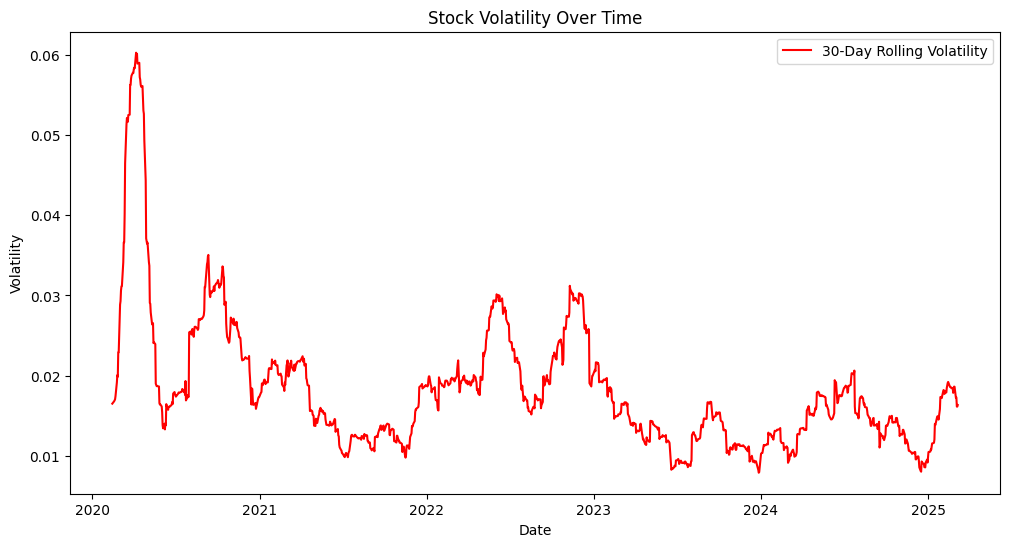

In [150]:
volatility = df['Daily Return'].std()  # Standard deviation of daily returns
print(f"Stock Volatility: {volatility:.4f}")

# Rolling Volatility (30-day window)
df['Rolling Volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Rolling Volatility'], label="30-Day Rolling Volatility", color='red')
plt.title("Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


In this case, 0.0199 represents a daily volatility of about 1.99% (since volatility is often expressed in decimal form, to convert to percentage, multiply by 100).
A volatility of 1.99% means the stock price fluctuates by about ±1.99% daily.



## ⚡ Understanding Volatility  

Volatility is a key **risk factor**. Higher volatility means larger fluctuations in price, indicating <span style="color:red; font-weight:bold;">higher risk</span>.  

### 🔍 Key Insights:  
🔴 <span style="color:red;">**High Volatility**</span> → Indicates <span style="color:red;">**higher risk**</span> ⚠️  
🟢 <span style="color:green;">**Stable Low Volatility**</span> → Suggests <span style="color:green;">**lower risk**</span> ✅  


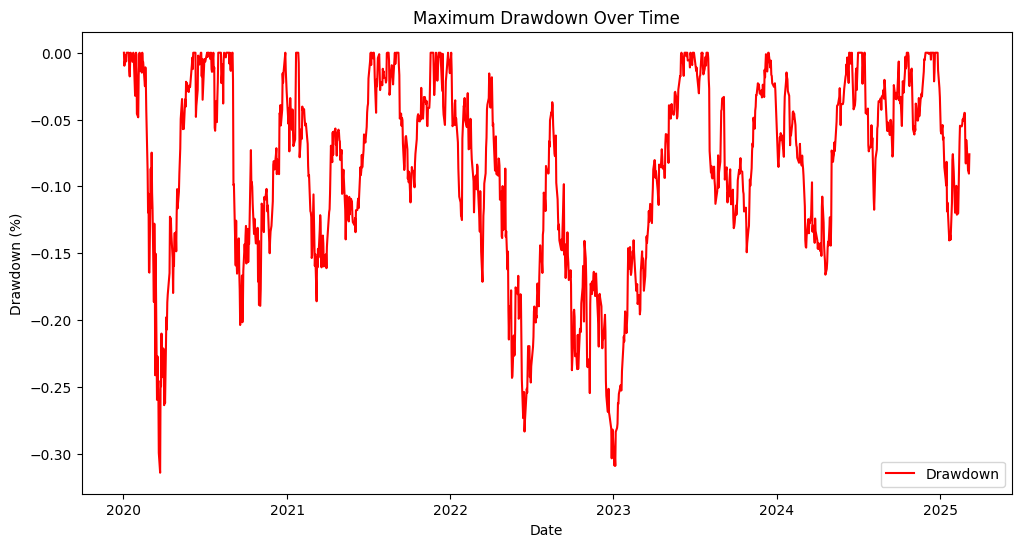

Maximum Drawdown: -31.43%


In [151]:
df['Cumulative Max'] = df['Close'].cummax()
df['Drawdown'] = df['Close'] / df['Cumulative Max'] - 1
max_drawdown = df['Drawdown'].min()

plt.figure(figsize=(12,6))
plt.plot(df['Drawdown'], label="Drawdown", color='red')
plt.title("Maximum Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.show()

print(f"Maximum Drawdown: {max_drawdown:.2%}")


## 📉 Understanding Maximum Drawdown (MDD)  

Maximum Drawdown (**MDD**) represents the **worst peak-to-trough decline** during a given period, highlighting the **biggest potential loss** an asset has suffered.  

### 🔍 Key Insights:  
🟢 <span style="color:green;">**Lower Drawdown (-X%)**</span> → Indicates **better risk management** ✅  
🔴 <span style="color:red;">**Large Drawdowns**</span> → Suggests the stock has experienced **major crashes** ⚠️  


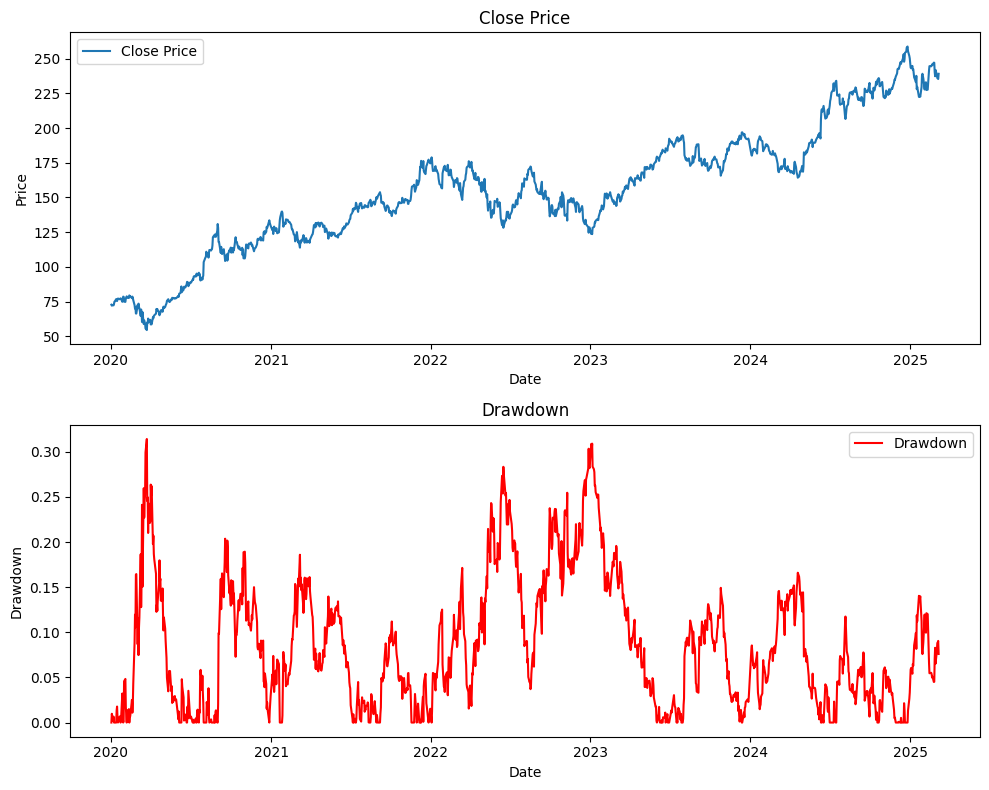

In [152]:
# Calculate the cumulative maximum value (peak value)
df['Cumulative Max'] = df['Close'].cummax()

# Calculate the drawdown using the peak and trough values
df['Drawdown'] = (df['Cumulative Max'] - df['Close']) / df['Cumulative Max']

# Plot the Close price and the Drawdown
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting the 'Close' price
ax[0].plot(df.index, df['Close'], label='Close Price')
ax[0].set_title('Close Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plotting the Drawdown
ax[1].plot(df.index, df['Drawdown'], label='Drawdown', color='red')
ax[1].set_title('Drawdown')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Drawdown')
ax[1].legend()

plt.tight_layout()
plt.show()

![Example Image](drawdown.png)


In [153]:
risk_free_rate = 0.02  # 2% annualized risk-free rate
annual_return = df['Daily Return'].mean() * 252  # Convert daily returns to annualized returns
annual_volatility = df['Daily Return'].std() * np.sqrt(252)  # Convert to annualized volatility

sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: 0.83


<p>The Sharpe Ratio measures risk-adjusted return. A higher Sharpe Ratio means better returns per unit of risk.</p>

<p><strong>Formula:</strong></p>
<p><i>Sharpe Ratio = (R<sub>p</sub> - R<sub>f</sub>) / σ<sub>p</sub></i></p>

<p>Where:</p>
<ul>
    <li><strong>R<sub>p</sub></strong> = Average return</li>
    <li><strong>R<sub>f</sub></strong> = Risk-free rate (e.g., US Treasury Bonds ~2%)</li>
    <li><strong>σ<sub>p</sub></strong> = Standard deviation of returns</li>
</ul>

<p><strong>Interpretation:</strong></p>
<ul>
    <li>Sharpe Ratio > 1 → Good risk-adjusted return.</li>
    <li>Sharpe Ratio < 1 → Poor risk-adjusted return.</li>
    <li>Sharpe Ratio > 3 → Excellent performance.</li>
</ul>


In [156]:
var_95 = df['Daily Return'].quantile(0.05)
print(f"95% Value at Risk: {var_95:.2%}")


95% Value at Risk: -3.05%


Interpretation:

VaR = -3% → 95% chance the stock won’t lose more than 3% in a day.

# Data preprocessing 

In [165]:

# Select 'Close' price and scale
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']].values)
scaled_data

array([[0.08941487],
       [0.08595425],
       [0.08876309],
       ...,
       [0.88743456],
       [0.88542755],
       [0.90373528]])

In [166]:
# Function to create sequences
def create_sequences(data, time_step=60):
    X, y = [], [] 
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Set sequence length (e.g., past 60 days → predict next day)
time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Split into training & test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [167]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Get the last time step output
        return out


In [168]:
# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train the model
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.6f}")


Epoch 10/50, Loss: 0.000768
Epoch 20/50, Loss: 0.000824
Epoch 30/50, Loss: 0.001588
Epoch 40/50, Loss: 0.002209
Epoch 50/50, Loss: 0.001777


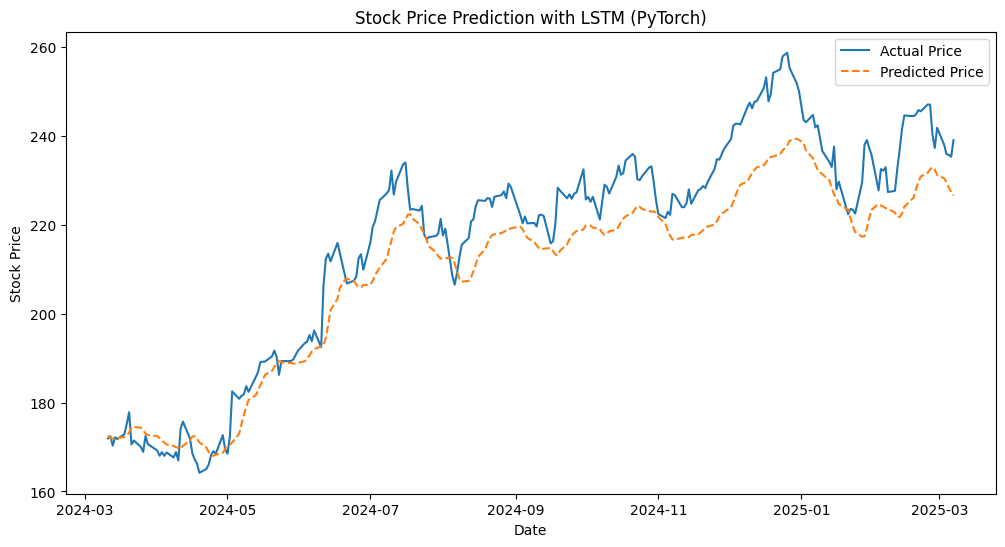

In [169]:
# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X_test).cpu().numpy()

# Inverse transform predictions
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.cpu().numpy().reshape(-1,1))

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], actual_prices, label="Actual Price")
plt.plot(df.index[-len(y_test):], predictions, label="Predicted Price", linestyle="dashed")
plt.title("Stock Price Prediction with LSTM (PyTorch)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_prices, predictions)
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 7.7369
MSE: 87.7131
RMSE: 9.3655


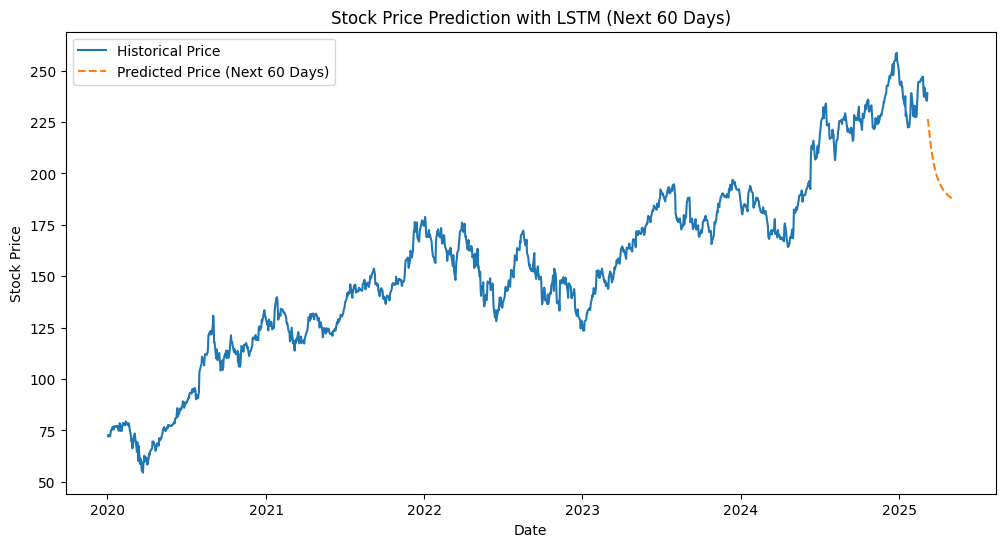

In [176]:
# Get the last 60 days from the dataset (use scaled data for prediction)
last_60_days = scaled_data[-60:]

# Reshape and prepare input data for prediction
input_seq = torch.tensor(last_60_days, dtype=torch.float32).unsqueeze(0).to(device)

# Predict the next 60 days
model.eval()
with torch.no_grad() :
    future_predictions = []
    for _ in range(60):  # For each day, predict the next day's price
        # Get the model prediction
        prediction = model(input_seq).cpu().numpy()
        future_predictions.append(prediction[0][0])

        # Prepare input for the next iteration by adding the predicted price
        # The new input for the next prediction should have the shape (1, time_step, 1)
        new_input = torch.tensor([[prediction[0][0]]], dtype=torch.float32).unsqueeze(0).to(device)  # (1, 1, 1)
        
        # Update input sequence by shifting left and adding the new predicted value
        input_seq = torch.cat((input_seq[:, 1:, :], new_input), dim=1)

# Inverse transform the predictions to get the actual price scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create dates for the next 60 days (assuming daily frequency)
predicted_dates = pd.date_range(df.index[-1], periods=61, freq='D')[1:]

# Plot actual vs predicted future prices
plt.figure(figsize=(12,6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label="Historical Price")
plt.plot(predicted_dates, future_predictions, label="Predicted Price (Next 60 Days)", linestyle="dashed")
plt.title("Stock Price Prediction with LSTM (Next 60 Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
